In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models,datasets

In [4]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()
train_images,test_images = train_images/255.0,test_images/255.0

[]

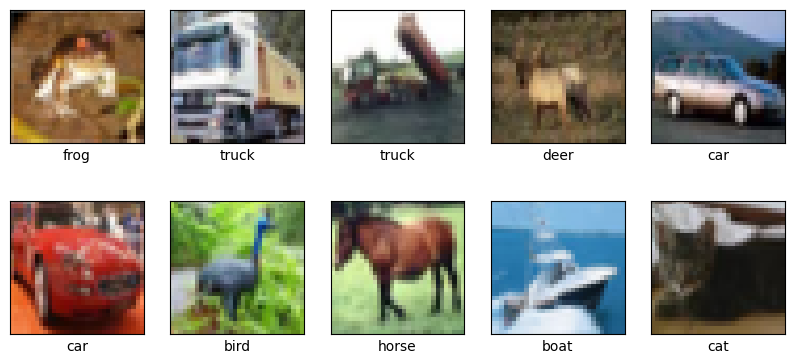

In [6]:
class_names = ['airplane','car','bird','cat','deer','lion','frog','horse','boat','truck']
plt.figure(figsize=(10,12))
for i in range(10) :
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.plot()

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 16)          9232      
                                                                 
 flatten_4 (Flatten)         (None, 256)              

In [19]:
epochs = 10
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
h = model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=epochs)

Epoch 1/10


1563/1563 [==============================] - 25s 15ms/step - loss: 1.6351 - accuracy: 0.3994 - val_loss: 1.3855 - val_accuracy: 0.4912
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.3065 - accuracy: 0.5328 - val_loss: 1.2667 - val_accuracy: 0.5514
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1833 - accuracy: 0.5791 - val_loss: 1.1402 - val_accuracy: 0.5925
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.1069 - accuracy: 0.6090 - val_loss: 1.1634 - val_accuracy: 0.5850
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0483 - accuracy: 0.6291 - val_loss: 1.0689 - val_accuracy: 0.6215
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0042 - accuracy: 0.6448 - val_loss: 1.0747 - val_accuracy: 0.6250
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9563 - accuracy: 0.6619 - val_loss: 0.9773